In [1]:
import numpy as np
from qze.many_zeno import trsolve
from qze.dimer import get_H_S, get_c_ops, thetas_to_state, state_to_yz_bloch
import matplotlib.pyplot as plt

In [ ]:
lambdas = [[.25, .25],
           [.25, 1.75],
           [1.25, .25]]

omega_S = 1
T = 20
dt = .01
dt_eval = .02
t_eval = np.arange(0, T + dt_eval, dt_eval)


Nth = 100
dth = 2*np.pi / Nth
tl0s = np.linspace(-np.pi + dth, np.pi, Nth)
psi0s = [thetas_to_state(tl, np.pi) for tl in tl0s]

In [3]:
nc_flow = []

for i, (lamb1, lamb2) in enumerate(lambdas):
    nc_flow.append([])
    for psi0 in psi0s:
        r = trsolve(get_H_S(omega_S),
                    psi0,
                    dt,
                    t_eval,
                    get_c_ops(lamb1, lamb2, omega_S),
                    ntraj=1,
                    no_click=True)
        nc_flow[i].append(r)

Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 

In [4]:
thetas = np.empty( (len(lambdas), Nth, len(t_eval), 2) )

for i, (lamb1, lamb2) in enumerate(lambdas):
    for j, nc_traj in enumerate(nc_flow[i]):
        traj_rhos = nc_traj.states[0]
        for k, rho in enumerate(traj_rhos):
            coords = state_to_yz_bloch(rho)
            tl = coords[0, 1]
            tr = coords[1, 1]
            thetas[i, j, k] = np.array([tl, tr])

# No-click dynamics

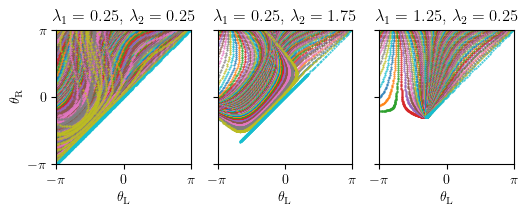

In [5]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    for j, nc_traj in enumerate(thetas[i]):
        tl = nc_traj[:, 0]
        tr = nc_traj[:, 1]
        
        for k, (l, r) in enumerate(zip(tl, tr)):
            if r < l:
                tl[k] = r
                tr[k] = l

        axs[i].plot(tl, tr,
                    '.', markersize=1)

    # flow = F(thetas, thetas, lmbd_1, lmbd_2)

    
    # axs[i].streamplot(thetas, thetas, flow, flow.T,
    #                   density=.75,
    #                   color="skyblue")
    axs[i].set_xlim((-np.pi, np.pi))
    axs[i].set_ylim((-np.pi, np.pi))
    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# plt.savefig("plots/dimer/tmp/dimer-full-no-click-flow.pdf")

[None]

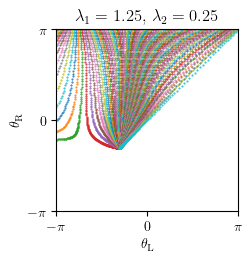

In [6]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 1)
for j, nc_traj in enumerate(thetas[2]):
    tl = nc_traj[:, 0]
    tr = nc_traj[:, 1]
    
    for k, (l, r) in enumerate(zip(tl, tr)):
        if r < l:
            tl[k] = r
            tr[k] = l

    axs.plot(tl, tr,
                '.', markersize=1)

# flow = F(thetas, thetas, lmbd_1, lmbd_2)


# axs[i].streamplot(thetas, thetas, flow, flow.T,
#                   density=.75,
#                   color="skyblue")
axs.set_xlim((-np.pi, np.pi))
axs.set_ylim((-np.pi, np.pi))
axs.set_xticks(ticks)
axs.set_xticklabels(tick_labels)
axs.set_yticks(ticks)
axs.set_yticklabels(tick_labels)
axs.set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
axs.set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
axs.set(aspect='equal')
# plt.savefig("plots/dimer/tmp/dimer-full-no-click-flow.pdf")

## Phase diagram

In [7]:
from many_zeno import trsolve
import dimer
import qutip

In [8]:
omega_S = 1
H_S = dimer.get_H_S(omega_S)
psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))
dt = .01
T = 25
tlist = np.arange(0, T+dt/2, dt)
c_ops = dimer.get_c_ops(.5, .5, omega_S)

res = trsolve(H_S, psi0, dt, tlist, c_ops, ntraj=1, no_click=True)

Trajectory #1 of 1 computed.


In [9]:
coords = states_to_yz_bloch(res.states[0])

NameError: name 'states_to_yz_bloch' is not defined

In [ ]:
(rl, tl), (rr, tr) = coords

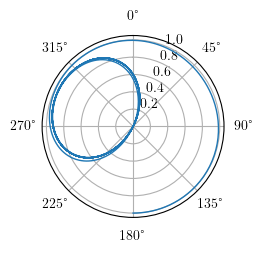

In [ ]:
plt.polar(tl, rl)

plt.gca().set_theta_direction(-1)
plt.gca().set_theta_zero_location('N')
# plt.savefig("/tmp/shit.pdf")

In [ ]:
stage = 0
for i in range(len(tl)-1):
    if tl[i+1] > tl[i]:
        if tl[i+1] > np.pi / 2:
            stage = 1
            break
        else:
            stage = 2
        # print(i)

print(stage)

2


In [ ]:
omega_S = 1
H_S = dimer.get_H_S(omega_S)
psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))
dt = .01
T = 10
tlist = np.arange(0, T+dt/2, dt)

lmbd_1_list = np.linspace(0, 1, 101)
lmbd_2_list = np.linspace(0, .5, 201)

stage = np.ones( (len(lmbd_2_list), len(lmbd_1_list)) )
for i, lmbd_2 in enumerate(lmbd_2_list):
    for j, lmbd_1 in enumerate(lmbd_1_list):
        c_ops = dimer.get_c_ops(lmbd_1, lmbd_2, omega_S)
        res = trsolve(H_S, psi0, dt, tlist, c_ops, ntraj=1, no_click=True)
        (rl, tl), (rr, tr) = states_to_yz_bloch(res.states[0])
        for k in range(len(tl)-1):
            if tl[k+1] > tl[k]:
                if tl[k+1] < np.pi/2:
                    stage[i, j] = 1
                    break
                else:
                    stage[i, j] = 2

Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 of 1 computed.
Trajectory #1 

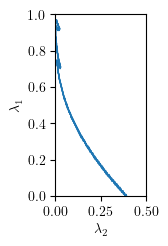

In [ ]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

plt.xlabel(r"$\lambda_2$")
plt.ylabel(r"$\lambda_1$")
plt.contour(lmbd_2_list, lmbd_1_list, stage.T,
            colors="tab:blue",
            linewidths=.85)

# plt.plot(dat[:,1][1:], dat[:,0][1:])

plt.gca().set_aspect('equal')

# plt.text(.5,.33, "I",
#          ha="center", va="center")
# plt.text(2.25,.33, "II",
#          ha="center", va="center")
# plt.text(1.5, 1.85, "III",
#          ha="center", va="center")

# plt.hlines(1,0,10)
# plt.xlim((1.03,1.07))
# plt.ylim((.35,.4))
# plt.xlim((0, 3))
# plt.ylim((0, 3))
# plt.savefig("plots/dimer-full-stages-diagram.pdf", bbox_inches="tight")

In [ ]:
import pickle

f = open("data/dimer-full-stage-II-III-boundary.pkl", "rb")
dat = pickle.load(f)
f.close()

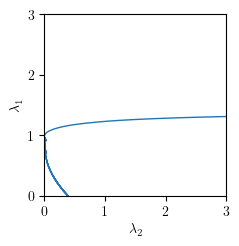

In [ ]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

plt.xlabel(r"$\lambda_2$")
plt.ylabel(r"$\lambda_1$")
plt.contour(lmbd_2_list, lmbd_1_list, stage.T,
            colors="tab:blue",
            linewidths=.85)

plt.plot(dat[0], dat[1],
         lw=1,
         color="tab:blue")

plt.gca().set_aspect('equal')

# plt.text(.5,.33, "I",
#          ha="center", va="center")
# plt.text(2.25,.33, "II",
#          ha="center", va="center")
# plt.text(1.5, 1.85, "III",
#          ha="center", va="center")

plt.xlim ( (0, 3) )
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 1, 2, 3])

plt.savefig("plots/dimer/dimer-full-stages-diagram.pdf", bbox_inches="tight")

In [ ]:
# omega_S = 1
# H_S = dimer.get_H_S(omega_S)
# psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))
# dt = .01
# T = 100
# tlist = np.arange(0, T+dt/2, dt)

# lmbd_1_list = np.linspace(0, 2, 5)
# lmbd_2_list = np.linspace(0, 2, 5)

# fig, axs = plt.subplots(len(lmbd_1_list), len(lmbd_2_list),
#                         figsize=(20, 20),
#                         subplot_kw={'projection': 'polar'})


# for i, lmbd_2 in enumerate(lmbd_2_list):
#     for j, lmbd_1 in enumerate(lmbd_1_list):
#         x = i
#         y = len(lmbd_1_list) - 1 - j

#         c_ops = dimer.get_c_ops(lmbd_1, lmbd_2, omega_S)
#         res = trsolve(H_S, psi0, dt, tlist, c_ops, ntraj=1, no_click=True)
#         (rl, tl), (rr, tr) = states_to_yz_bloch(res.states[0])
#         axs[y, x].plot(tl, rl)
#         # axs[y, x].plot(tr, rr)
#         axs[y, x].set_theta_direction(-1)
#         axs[y, x].set_theta_zero_location('N')
#         axs[y, x].set(xlabel=rf"$\lambda_2={lmbd_2:.1f}$", ylabel=rf"$\lambda_1={lmbd_1:.1f}$")

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
# omega_S = 1
# H_S = dimer.get_H_S(omega_S)
# psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))
# dt = .01
# T = 100
# tlist = np.arange(0, T+dt/2, dt)

# lmbd_1_list = np.linspace(0, 2, 40)
# # lmbd_2_list = np.linspace(0, 2, 5)
# lmbd_2_list = np.array([.5, 1])

# fig, axs = plt.subplots(len(lmbd_1_list), len(lmbd_2_list),
#                         figsize=(10, 200),
#                         subplot_kw={'projection': 'polar'})


# for i, lmbd_2 in enumerate(lmbd_2_list):
#     for j, lmbd_1 in enumerate(lmbd_1_list):
#         x = i
#         y = len(lmbd_1_list) - 1 - j

#         c_ops = dimer.get_c_ops(lmbd_1, lmbd_2, omega_S)
#         res = trsolve(H_S, psi0, dt, tlist, c_ops, ntraj=1, no_click=True)
#         (rl, tl), (rr, tr) = states_to_yz_bloch(res.states[0])
#         axs[y, x].plot(tl, rl)
#         # axs[y, x].plot(tr, rr)
#         axs[y, x].set_theta_direction(-1)
#         axs[y, x].set_theta_zero_location('N')
#         axs[y, x].set(xlabel=rf"$\lambda_2={lmbd_2:.1f}$", ylabel=rf"$\lambda_1={lmbd_1:.1f}$")

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
nc_flow[i][0].states[0]

[Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.92335428e-18+0.00000000e+00j]
  [0.00000000e+00+3.14107591e-02j]
  [0.00000000e+00-6.12021255e-17j]
  [9.99506560e-01+0.00000000e+00j]],
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[3.32344703e-04+0.j        ]
  [0.00000000e+00+0.02182823j]
  [0.00000000e+00-0.01057538j]
  [9.99705746e-01+0.j        ]],
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[4.70705408e-04+0.j        ]
  [0.00000000e+00+0.01193726j]
  [0.00000000e+00-0.02149079j]
  [9.99697668e-01+0.j        ]],
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[3.96951923e-04+0.j        ]
  [0.00000000e+00+0.00173219j]
  [0.00000000e+00-0.03275241j]
  [9.99461916e-01+0.j        ]],
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[9.17842013e-05+0.j    

In [ ]:
thetas[0][0][:, 0]

array([-2.51327412, -2.51577045, -2.51833144, ..., -0.94539941,
       -0.94539963, -0.94539985])